In [1]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import Callback

In [ ]:
# Load the dataset
data = pd.read_csv(Path('Training_Fraudulent_E-Commerce_Transaction_Data.csv'))

# Review the DataFrame
print(data.nunique())
data.head()


Transaction ID        1472952
Customer ID           1472952
Transaction Amount     108998
Transaction Date      1346684
Payment Method              4
Product Category            5
Quantity                    5
Customer Age               97
Customer Location       99135
Device Used                 3
IP Address            1472651
Shipping Address      1472948
Billing Address       1472949
Is Fraudulent               2
Account Age Days          365
Transaction Hour           24
dtype: int64


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [3]:
# Display dataset structure
print(data.info())

# View the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [4]:
# Drop irrelevant columns
data_cleaned = data.drop(columns=['Transaction ID', 'Customer ID', 'IP Address', 'Shipping Address', 'Billing Address'])
data_cleaned


# Convert 'Transaction Date' to datetime and extract features
data_cleaned['Transaction Date'] = pd.to_datetime(data_cleaned['Transaction Date'])
data_cleaned['Year'] = data_cleaned['Transaction Date'].dt.year
data_cleaned['Month'] = data_cleaned['Transaction Date'].dt.month
data_cleaned['Day'] = data_cleaned['Transaction Date'].dt.day
data_cleaned['Hour'] = data_cleaned['Transaction Date'].dt.hour
data_cleaned = data_cleaned.drop(columns=['Transaction Date'])


data_cleaned = pd.get_dummies(data_cleaned, columns=['Payment Method', 'Product Category', 'Device Used'], drop_first=True)
data_cleaned



,Transaction Amount,Quantity,Customer Age,Customer Location,Is Fraudulent,Account Age Days,Transaction Hour,Year,Month,Day,Hour,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_mobile,Device Used_tablet
0,58.09,1,17,Amandaborough,0,30,5,2024,2,20,5,True,False,False,True,False,False,False,False,True
1,389.96,2,40,East Timothy,0,72,8,2024,2,25,8,False,False,True,True,False,False,False,False,False
2,134.19,2,22,Davismouth,0,63,3,2024,3,18,3,False,False,False,False,False,True,False,False,True
3,226.17,5,31,Lynnberg,0,124,20,2024,3,16,20,True,False,False,False,False,False,False,False,False
4,121.53,2,51,South Nicole,0,158,5,2024,1,15,5,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,208.48,2,29,North Laurafort,0,149,23,2024,1,12,23,False,False,False,False,True,False,False,False,False
1472948,231.57,2,32,Burnsville,0,132,4,2024,3,27,4,False,True,False,False,False,False,False,False,True
1472949,101.80,4,36,Garciafort,0,98,23,2024,1,31,23,True,False,False,True,False,False,False,True,False
1472950,61.80,5,34,Lake Josephberg,0,191,16,2024,1,12,16,True,False,False,True,False,False,False,False,False


In [5]:
# Define features and target
X = data_cleaned.drop(columns=['Is Fraudulent'])
y = data_cleaned['Is Fraudulent']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (1472952, 19)
Target shape: (1472952,)


In [6]:
X

,Transaction Amount,Quantity,Customer Age,Customer Location,Account Age Days,Transaction Hour,Year,Month,Day,Hour,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_mobile,Device Used_tablet
0,58.09,1,17,Amandaborough,30,5,2024,2,20,5,True,False,False,True,False,False,False,False,True
1,389.96,2,40,East Timothy,72,8,2024,2,25,8,False,False,True,True,False,False,False,False,False
2,134.19,2,22,Davismouth,63,3,2024,3,18,3,False,False,False,False,False,True,False,False,True
3,226.17,5,31,Lynnberg,124,20,2024,3,16,20,True,False,False,False,False,False,False,False,False
4,121.53,2,51,South Nicole,158,5,2024,1,15,5,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,208.48,2,29,North Laurafort,149,23,2024,1,12,23,False,False,False,False,True,False,False,False,False
1472948,231.57,2,32,Burnsville,132,4,2024,3,27,4,False,True,False,False,False,False,False,False,True
1472949,101.80,4,36,Garciafort,98,23,2024,1,31,23,True,False,False,True,False,False,False,True,False
1472950,61.80,5,34,Lake Josephberg,191,16,2024,1,12,16,True,False,False,True,False,False,False,False,False


In [7]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_test, y_train, y_test

(         Transaction Amount  Quantity  Customer Age Customer Location  \
 880819              1335.11         5            23       West Andrew   
 940422                92.90         2            24         Robertton   
 361927               326.67         5            31         East Troy   
 296530                11.00         3            45      Cardenasside   
 609386                95.01         5            36         Markmouth   
 ...                     ...       ...           ...               ...   
 858137               161.47         2            36        Whitemouth   
 1312744               17.23         1            51   Villarrealmouth   
 252556                47.41         2            32        Sandraland   
 809571                35.72         1            49        Lake April   
 308214               501.46         3            31       Brandymouth   
 
          Account Age Days  Transaction Hour  Year  Month  Day  Hour  \
 880819                 35            

In [8]:
print("Customer Location" in X_train.columns)

True


In [9]:
X_train = X_train.drop(columns=['Customer Location'])
X_test = X_test.drop(columns=['Customer Location'])


In [10]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
## Compile, Train and Evaluate the Model


In [11]:
# Define the number of input features
number_input_features = X_train.shape[1]

# Define the number of nodes for each layer
hidden_nodes_layer1 =40
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10

# Initialize the sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer (binary classification)
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\ProgramData\anaconda3\envs\tensorflowenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,831 (11.06 KB)

 Trainable params: 2,831 (11.06 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
fit_model

class ResultsCaptureCallback(Callback):
    def __init__(self):
        super().__init__()
        self.epoch_results = []  # List to store results for each epoch

    def on_epoch_end(self, epoch, logs=None):
        # Append the logs dictionary (metrics) for the current epoch to the list
        self.epoch_results.append(logs)
        print(f"Epoch {epoch + 1}: {logs}")

results_callback = ResultsCaptureCallback()

# Train the model with the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, callbacks=[results_callback])


all_results = results_callback.epoch_results


training_accuracy = [result['accuracy'] for result in all_results if 'accuracy' in result]
training_loss = [result['loss'] for result in all_results if 'loss' in result]

# Print results
print("All Epoch Results:", all_results)
print("Training Accuracy:", training_accuracy)
print("Training Loss:", training_loss)


Epoch 1/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.9659 - loss: 0.1352
Epoch 2/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - accuracy: 0.9705 - loss: 0.1154
Epoch 3/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step - accuracy: 0.9718 - loss: 0.1120
Epoch 4/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step - accuracy: 0.9716 - loss: 0.1128
Epoch 5/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - accuracy: 0.9716 - loss: 0.1130
Epoch 6/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.9717 - loss: 0.1121
Epoch 7/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.9717 - loss: 0.1125
Epoch 8/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - accuracy: 0.9718 - loss: 0.1121
Epoch 9/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9721 - loss: 0.1111
Epoch 10/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9720 - loss: 0.1113
Epoch 11/100
36824/36824 ━━━━━━━━━━━━━━━━━━━━ 37s 994us/step - accuracy: 0.9720

In [14]:
print(data.columns)

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')


In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9206/9206 - 8s - 819us/step - accuracy: 0.9716 - loss: 0.1123
Loss: 0.112273208796978, Accuracy: 0.9716250896453857


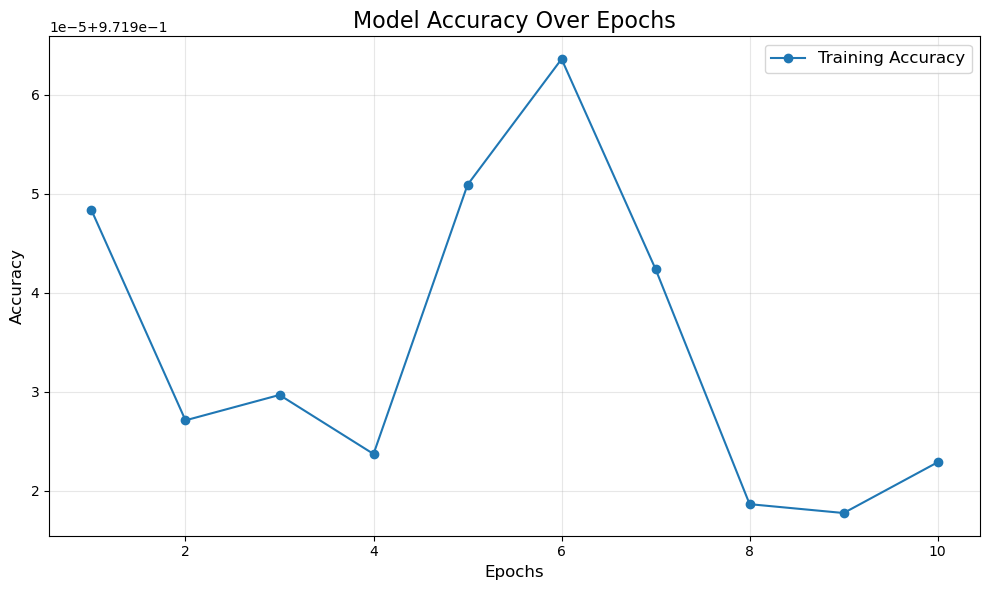

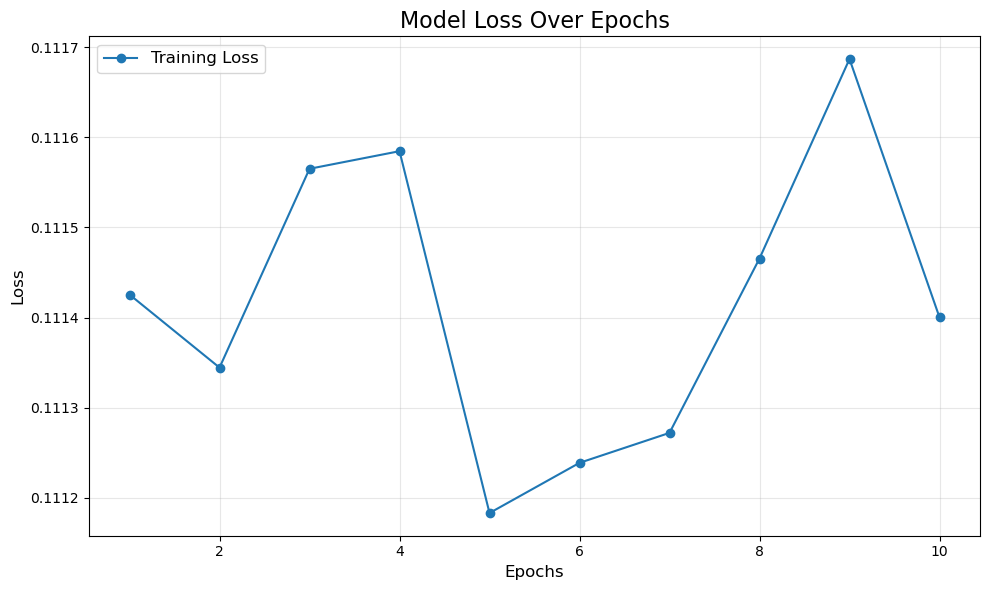

In [ ]:
Epochs = list(range(1, 11))  # Example: 10 epochs
training_accuracy = [entry['accuracy'] for entry in all_results]
training_loss = [entry['loss'] for entry in all_results]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(Epochs, training_accuracy, label="Training Accuracy", marker='o', linestyle='-', markersize=6)
plt.title("Model Accuracy Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Epochs, training_loss, label="Training Loss", marker='o', linestyle='-', markersize=6)
plt.title("Model Loss Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [17]:
# Export our model to HDF5 file
#nn.save("AlphabetSoupCharity.h5")

nn.save("Fraudulent transaction_Optimization.h5")